In [1]:
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
# Use the FULL MNIST training set (no 1k subset)
mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

[0.3469318801750739, 0.1752095735400915, 0.13376636189768712, 0.10630323220367233, 0.08931300467016796, 0.07590136528449754, 0.06571320290137082, 0.05837230638718854, 0.051636945862229916, 0.04673599012587219]
[0.1892804761176197, 0.14995858737954887, 0.12461784568290932, 0.11754162741093019, 0.10555634758146569, 0.10469767335019768, 0.10049432172654227, 0.09253116416709183, 0.08764686610028237, 0.09771266794196679]


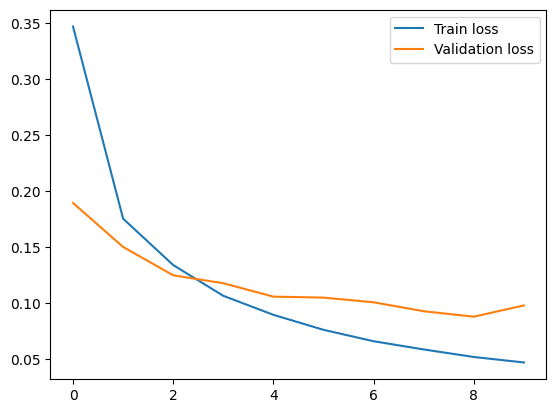

In [2]:
import matplotlib.pyplot as plt

# Replace the deep model with a smaller one (784→50→10)
model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))

print(train_losses)
print(val_losses)
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()